In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def main(eye_name):
    print("Start processing")
    eye_image = cv2.imread("healthy/" + eye_name)
    eye_image = cv2.filter2D(eye_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)
    eye_image_grey = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)
    
    plt.title("Input image")
    plt.imshow(eye_image)
    plt.show()
    
    plt.title("Grey image")
    plt.imshow(eye_image_grey)
    plt.show()
    
    width, height = np.shape(eye_image_grey)
    print(f"Check line: width : {width}, height : {height}")
    
    


Start processing


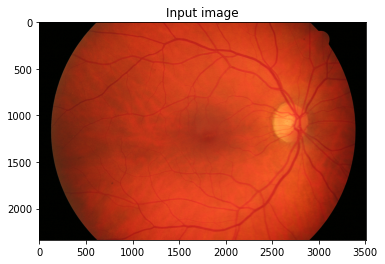

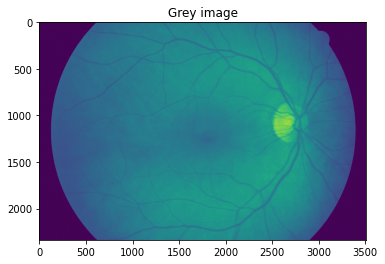

Width : 2336, height : 3504


In [8]:
main("05_h.jpg")